In [174]:
# import packages

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras as kb
from tensorflow.keras import layers
from plotnine import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [166]:
# importing CSV
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(len(df))
df.head()

506


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [167]:
# check for missing data
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [175]:
# correlation between feature
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


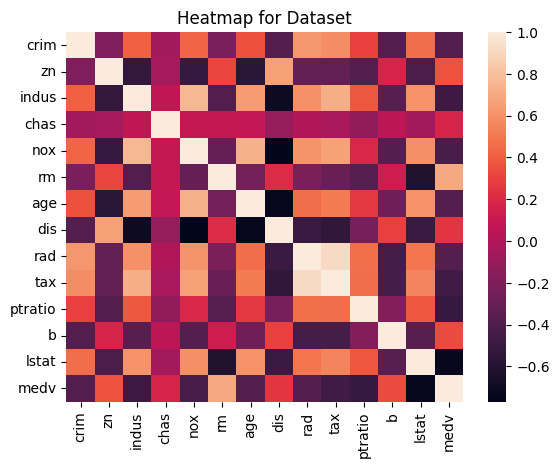

In [191]:
# correlation heatmap
ax = plt.axes()
sns.heatmap(df.corr(), ax = ax)
ax.set_title('Heatmap for Dataset')
plt.show()

<Axes: xlabel='rm', ylabel='medv'>

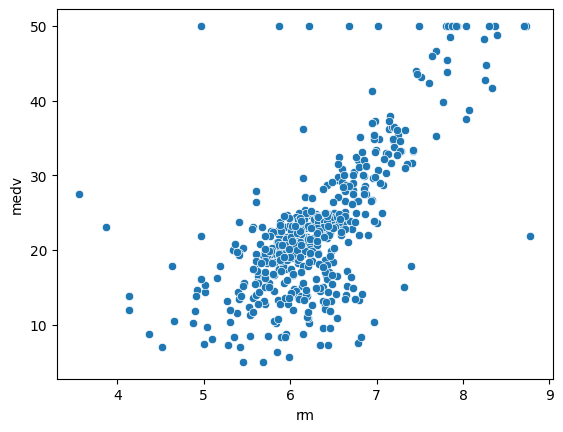

In [183]:
# scatterplot mdev vs rm
sns.scatterplot(x = "rm", y = "medv", data = df)

<Axes: xlabel='ptratio', ylabel='medv'>

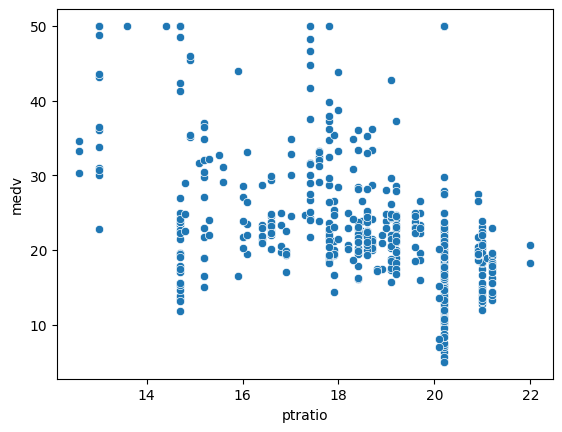

In [192]:
# scatterplot mdev vs ptratio
sns.scatterplot(x = "ptratio", y = "medv", data = df)

In [168]:
predictors = ["crim", "zn", "indus", "chas", "nox", 'rm', "age", "dis", "rad", "tax", "ptratio", "b", "lstat"]
X = df[predictors]
y = df["medv"]

# 80/20 Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [169]:
# z-scoring
z = StandardScaler()
X_train = z.fit_transform(X_train)
X_test = z.transform(X_test)

# model architecture
model = kb.Sequential([
    kb.layers.Dense(64, activation = 'relu', input_shape = [13]),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(128, activation = 'relu'),
    kb.layers.Dropout(0.2),
    kb.layers.BatchNormalization(),
    kb.layers.Dense(256, activation = 'relu'),
    kb.layers.BatchNormalization(),
    kb.layers.Dropout(0.3),
    kb.layers.Dense(128, activation = 'relu'),
    kb.layers.Dense(1)
])

# compiling the model
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_error'])
model.summary()

# early stopping
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'mean_absolute_error', patience = 20)]

# fitting the model with early stopping
model_history = model.fit(X_train, y_train, epochs = 200, validation_split = 0.1, callbacks = [callbacks])

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_194 (Dense)           (None, 64)                896       
                                                                 
 batch_normalization_108 (Ba  (None, 64)               256       
 tchNormalization)                                               
                                                                 
 dense_195 (Dense)           (None, 128)               8320      
                                                                 
 dropout_68 (Dropout)        (None, 128)               0         
                                                                 
 batch_normalization_109 (Ba  (None, 128)              512       
 tchNormalization)                                               
                                                                 
 dense_196 (Dense)           (None, 256)             

In [170]:
# evaluating the model on the train set
train_loss, train_mae = model.evaluate(X_train, y_train)
print('Train loss: ', train_loss, 'Train MAE :', train_mae)

# evaluating the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print('Test loss: ', test_loss, 'Test MAE: ', test_mae)

13/13 [==============================] - 0s 709us/step - loss: 2.8978 - mean_absolute_error: 1.2689
Train loss:  2.89776611328125 Train MAE : 1.2689417600631714
4/4 [==============================] - 0s 667us/step - loss: 5.5670 - mean_absolute_error: 1.8448
Test loss:  5.566975116729736 Test MAE:  1.8448398113250732


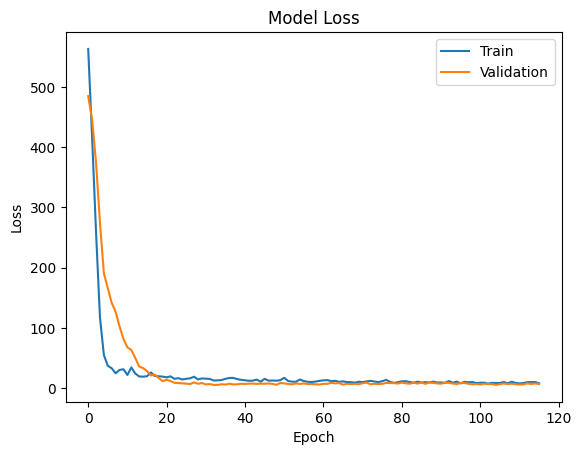

In [171]:
# training history
plt.plot(model_history.history['loss'], label = 'Train')
plt.plot(model_history.history['val_loss'], label = 'Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc = 'upper right')

4/4 [==============================] - 0s 834us/step


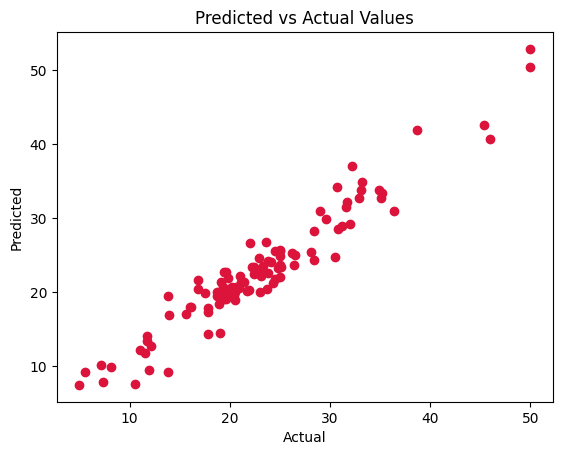

In [172]:
# using the model on test data
y_pred = model.predict(X_test)

# graph to show the predicted vs actual values
plt.scatter(y_test, y_pred, c = "crimson")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.title("Predicted vs Actual Values")

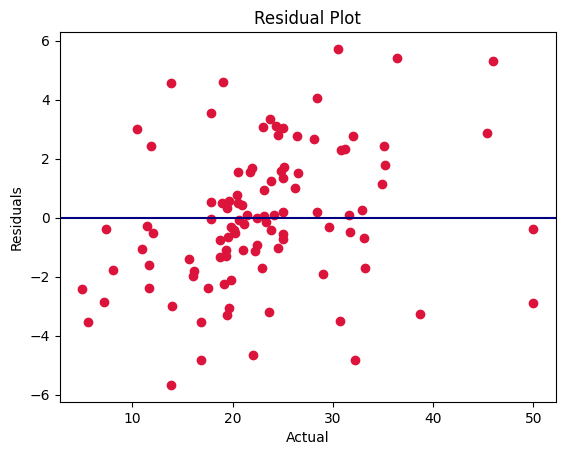

In [173]:
# calculating residuals with .flatten() becaused y_pred is not 1 dimensional
residuals = y_test - y_pred.flatten()

# residual plot
plt.scatter(y_test, residuals, c = "crimson")
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(c = 'navy')